<a href="https://colab.research.google.com/github/Farvezf/Medical-Insurance-Price-prediction/blob/main/Medical_Insurance_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imporing Libraries**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

**Data Collection and Analysis**

In [5]:
# Read the dataset by using pandas DataFrame
insurance_dataset = pd.read_csv('insurance.csv')

In [ ]:
# Calling the first rows by using head function
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Find the rows and columns by using shape function
insurance_dataset.shape

(1338, 7)

In [ ]:
# Find all the datatypes in insurance_dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


catogeries colums:
sex
smoker
region

In [ ]:
# checking the missing values in the dataset
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


Data Analysis

In [ ]:
# statical measure for dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Find all the distribution for the numerical columns

<ipython-input-16-2a97113654df>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


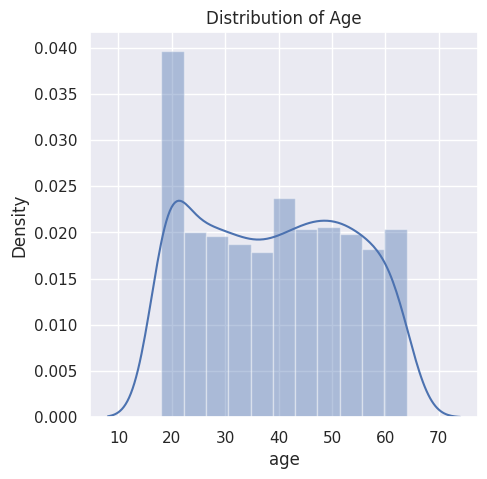

In [ ]:
# Find the distribution for age column
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['age'])
plt.title('Distribution of Age')
plt.show()

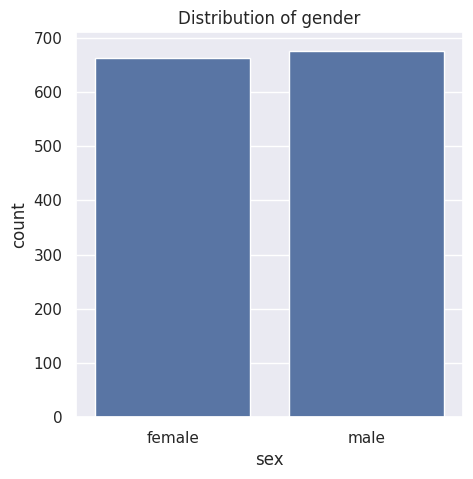

In [ ]:
# Gender column
plt.figure(figsize=(5,5))
sns.countplot(x='sex',data=insurance_dataset)
plt.title('Distribution of gender')
plt.show()


In [ ]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-27-7215e78f71d8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


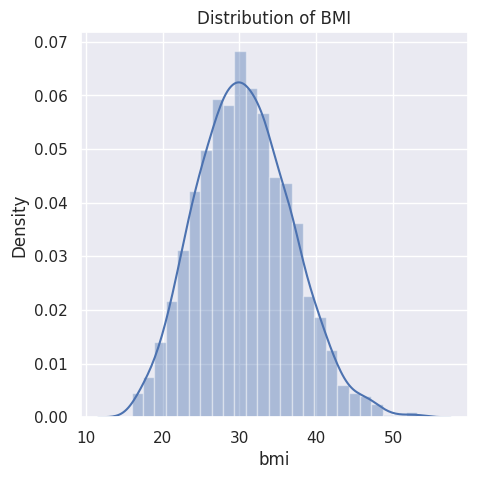

In [ ]:
# bmi column
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['bmi'])
plt.title('Distribution of BMI')
plt.show()

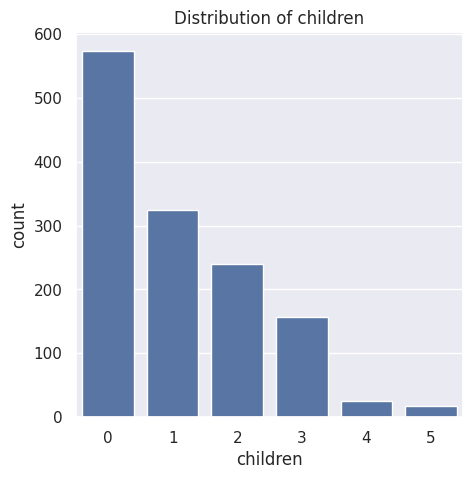

In [ ]:
# Children column
plt.figure(figsize=(5,5))
sns.countplot(x='children',data=insurance_dataset)
plt.title('Distribution of children')
plt.show()


In [ ]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


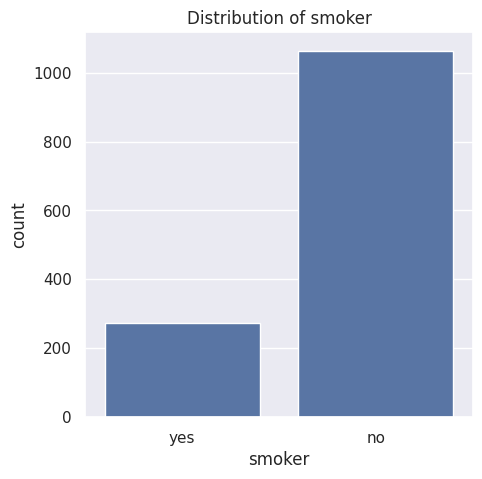

In [ ]:
# Smoker column
plt.figure(figsize=(5,5))
sns.countplot(x='smoker',data=insurance_dataset)
plt.title('Distribution of smoker')
plt.show()


In [ ]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


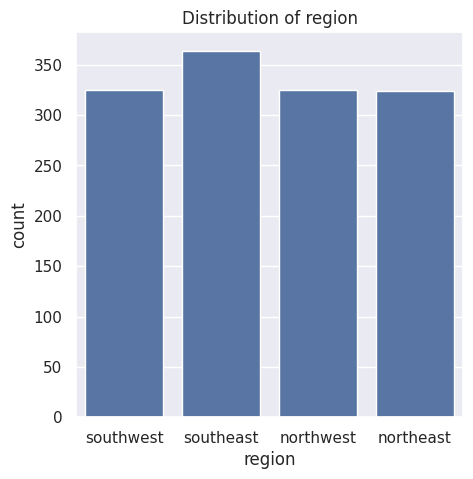

In [ ]:
# Region column
plt.figure(figsize=(5,5))
sns.countplot(x='region',data=insurance_dataset)
plt.title('Distribution of region')
plt.show()


In [ ]:
insurance_dataset['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,325
northeast,324


<ipython-input-39-a3d6dcc8a49c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


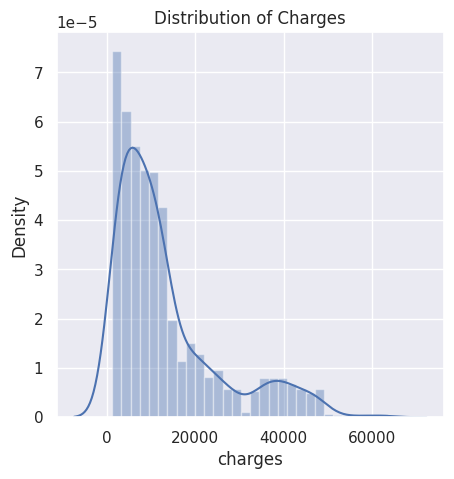

In [ ]:
# charges column
plt.figure(figsize=(5,5))
sns.distplot(insurance_dataset['charges'])
plt.title('Distribution of Charges')
plt.show()

Data PreProcessing

Encoding the catagorical features


In [6]:
# encode the sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# encode the smoker column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# encode the region column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

<ipython-input-6-b3a28e58bf28>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)
<ipython-input-6-b3a28e58bf28>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)
<ipython-input-6-b3a28e58bf28>:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

In [7]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


split the Features and Target

In [8]:
x=insurance_dataset.drop(columns='charges',axis=1)
y=insurance_dataset['charges']

In [ ]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       2
4      32    0  28.880         0       1       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       2
1334   18    1  31.920         0       1       3
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       2

[1338 rows x 6 columns]


In [ ]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Creating a model by using Random Forest regressor


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initializing the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_regressor.fit(X_train, y_train)

# Predictions
y_pred = rf_regressor.predict(X_test)

Evaluate the Model

In [15]:
r2 = r2_score(y_test, y_pred)
print(r2)

0.8636594426055946


Building a Predictive System

In [17]:
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf_regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3731.870776]
The insurance cost is USD  3731.8707760000066


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
